# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INPUT0    1492 non-null   float64
 1   INPUT1    1492 non-null   float64
 2   INPUT2    1492 non-null   float64
 3   INPUT3    1492 non-null   float64
 4   INPUT4    1492 non-null   float64
 5   INPUT5    1492 non-null   float64
 6   INPUT6    1492 non-null   float64
 7   INPUT7    1492 non-null   float64
 8   INPUT8    1492 non-null   float64
 9   TARGET_X  1492 non-null   float64
 10  TARGET_Y  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


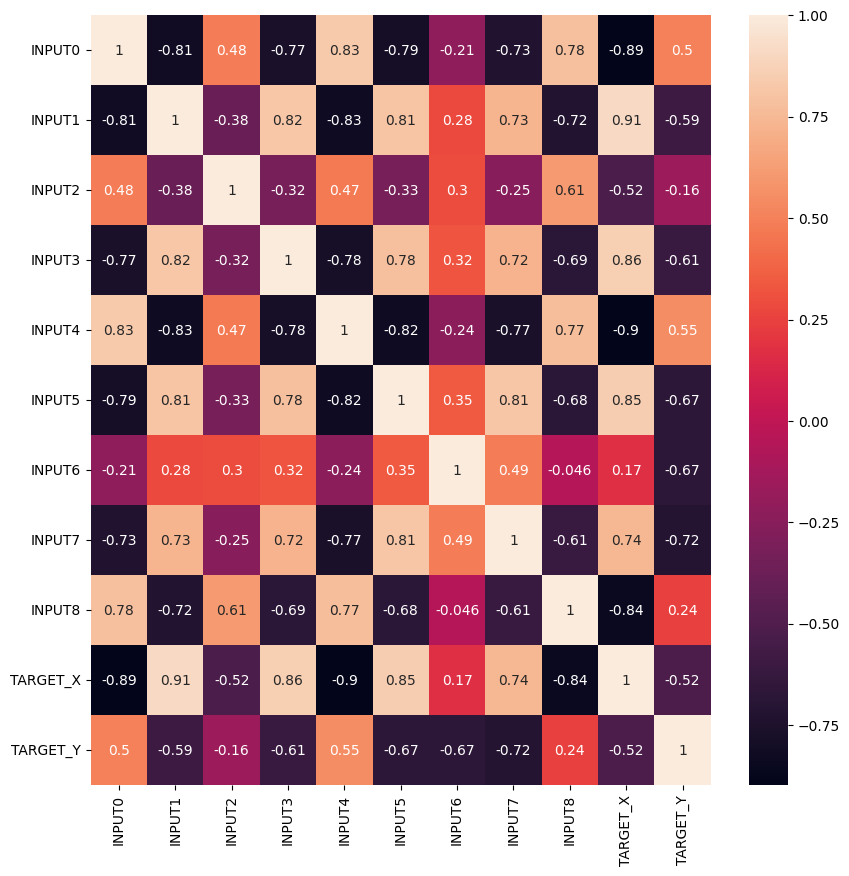

x_train  (1044, 9)
y_train  (1044, 2)
x_test  (448, 9)
y_test  (448, 2)


In [2]:
from set_extraction import x_train, y_train, x_test, y_test

# Models

In [3]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [4]:
def MEE(actual, predict):
    return np.mean(np.linalg.norm(actual - predict, axis=1))

In [5]:
results = []

Text(0, 0.5, 'MEE Score')

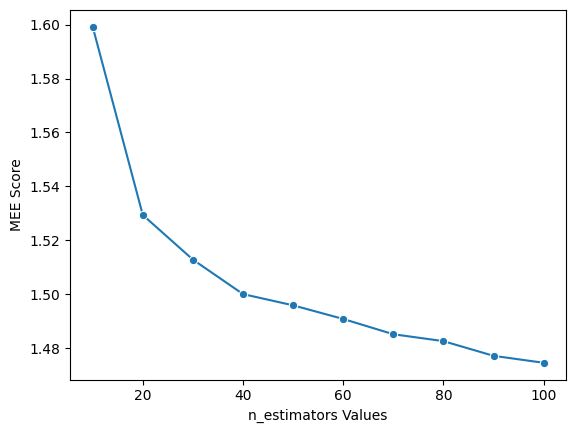

In [6]:
k_values = [i for i in range(10,110,10)]
scores = []

for k in k_values:
    knn = RandomForestRegressor(n_estimators=k, random_state=42)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("n_estimators Values")
plt.ylabel("MEE Score")

Text(0, 0.5, 'MEE Score')

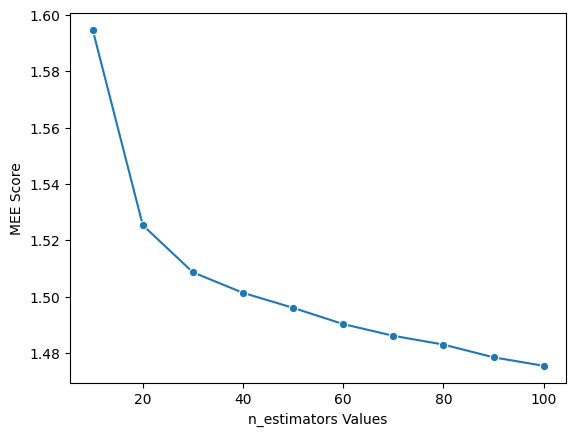

In [7]:
k_values = [i for i in range(10,110,10)]
scores = []

for k in k_values:
    knn = BaggingRegressor(n_estimators=k, random_state=42)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("n_estimators Values")
plt.ylabel("MEE Score")

# Ensemble 

## RandomForestRegressor

### Grid search for parameter setting 


In [9]:
params = { 
     'n_estimators': [50, 60, 70],
     'max_depth': [None, 5, 10, 15],
     'min_samples_split': [2, 3, 5],
     'min_samples_leaf': [1, 5, 10],
     'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1],
     'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

In [11]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

rfr_search = RandomForestRegressor(random_state=42, n_jobs=-1) 

rfr_cv = GridSearchCV(estimator=rfr_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
rfr_cv.fit(x_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05, 0.1],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1],
                         'n_estimators': [50, 60, 70]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [12]:
rfr_cv.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70}

In [13]:
# validation
rfr_cv.best_score_

-1.4792407153540128

In [14]:
# save the model to disk
joblib.dump(rfr_cv.best_estimator_, 'cup_models/rf4.z')

['cup_models/rf4.z']

### Final model

In [15]:
rfr = joblib.load('cup_models/rf4.z')

In [16]:
train_pred_rfr = rfr.predict(x_train)

In [17]:
print('MEE train set ', MEE(y_train, train_pred_rfr))

MEE train set  0.741663328944709


In [18]:
test_pred_rfr = rfr.predict(x_test)

In [19]:
print('MEE test set ', MEE(y_test, test_pred_rfr))

MEE test set  1.5291315418947937


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

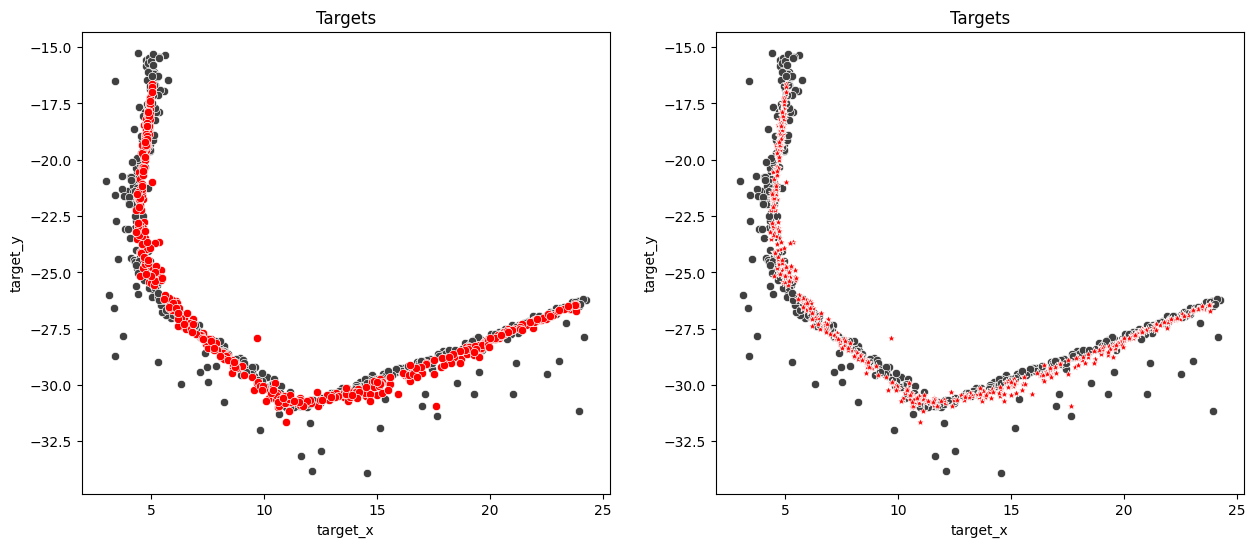

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='r',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

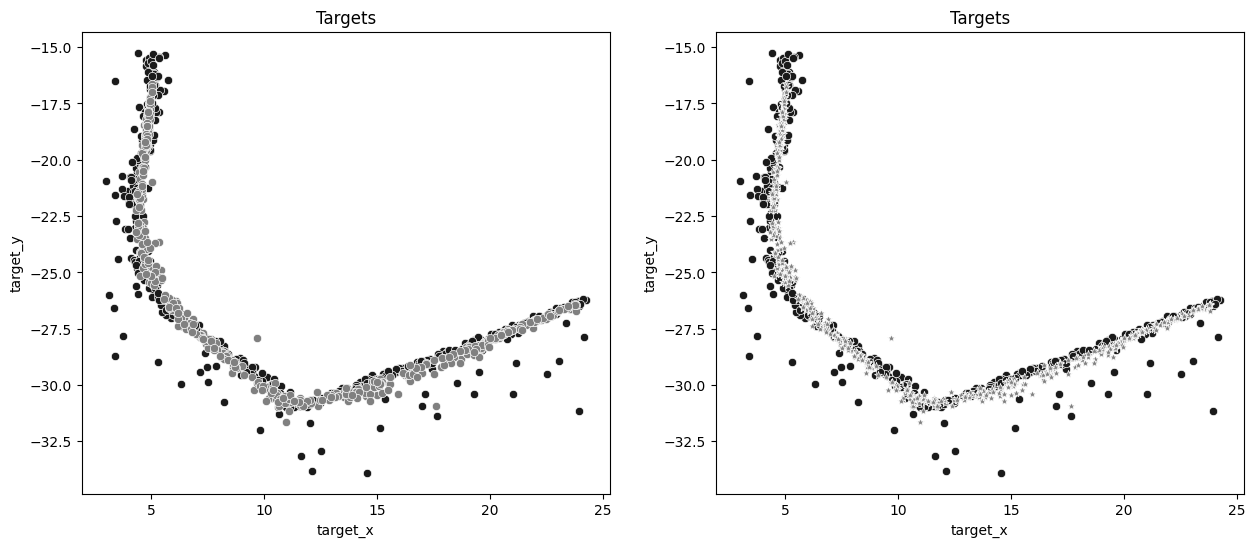

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_rfr[:,0],y=test_pred_rfr[:,1],color='.5',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [22]:
results.append(('RandomForestRegressor train', MEE(y_train, train_pred_rfr)))
results.append(('RandomForestRegressor validation', rfr_cv.best_score_))

## BaggingRegressor

### Grid search for parameter setting 


In [24]:
params = { 
     'n_estimators': [30, 40, 50, 60, 70],
     'max_samples': [1.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
     'bootstrap': [False, True],
     'bootstrap_features': [False, True]
}

In [26]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

br_search = BaggingRegressor(random_state=42, n_jobs=-1) 

br_cv = GridSearchCV(estimator=br_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                     cv=5, verbose=4, n_jobs=n_jobs_search) 
br_cv.fit(x_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(cv=5, estimator=BaggingRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'bootstrap_features': [False, True],
                         'max_samples': [1.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
                         'n_estimators': [30, 40, 50, 60, 70]},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [27]:
br_cv.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_samples': 0.3,
 'n_estimators': 70}

In [28]:
# validation
br_cv.best_score_

-1.475306421266638

In [29]:
# save the model to disk
joblib.dump(br_cv.best_estimator_, 'cup_models/br4.z')

['cup_models/br4.z']

### Final model

In [30]:
br = joblib.load('cup_models/br4.z')

In [31]:
train_pred_br = br.predict(x_train)

In [32]:
print('MEE train set ', MEE(y_train, train_pred_br))

MEE train set  1.0305045927715748


In [33]:
test_pred_br = br.predict(x_test)

In [34]:
print('MEE test set ', MEE(y_test, test_pred_br))

MEE test set  1.5170407001577624


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

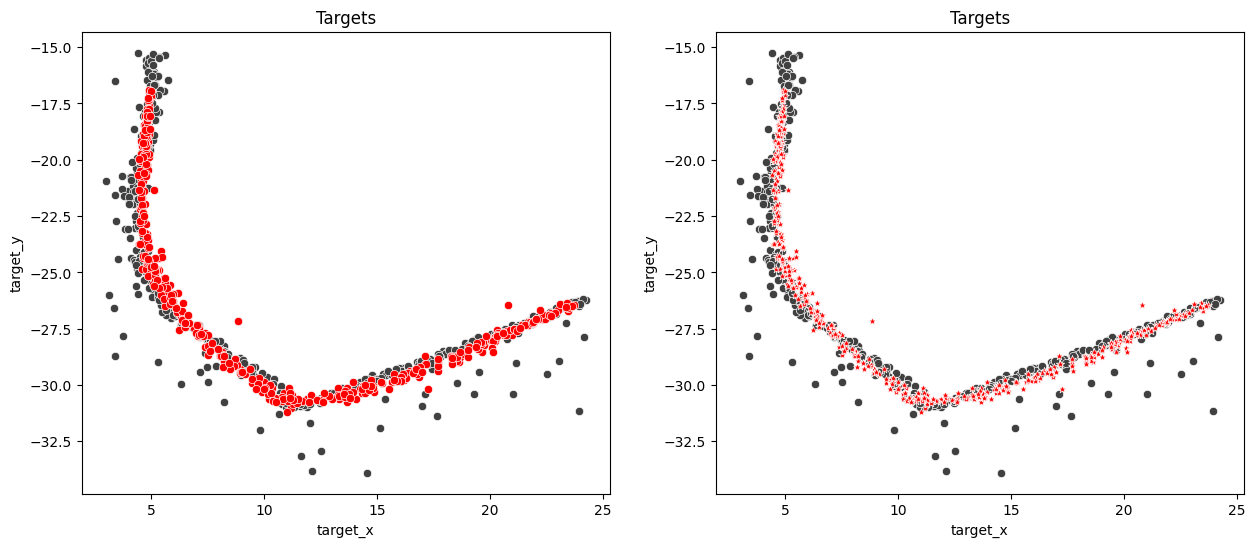

In [35]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='r',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

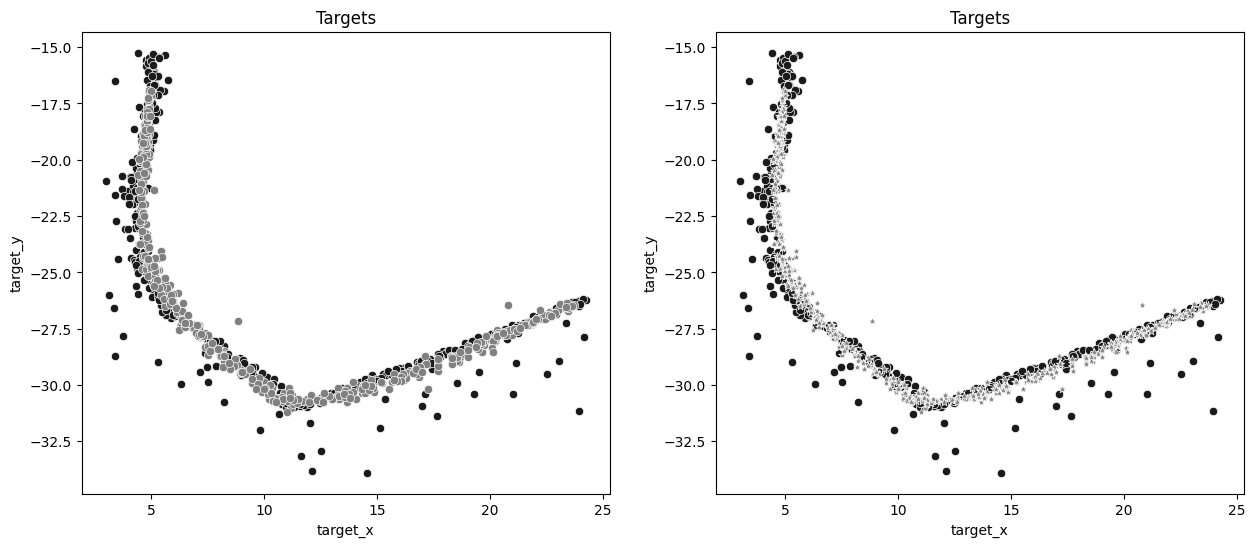

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_br[:,0],y=test_pred_br[:,1],color='.5',ax=ax[1], marker='*')
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [37]:
results.append(('BaggingRegressor train', MEE(y_train, train_pred_br)))
results.append(('BaggingRegressor validation', br_cv.best_score_))

# Summary

In [38]:
for i in range(len(results)):
  print(results[i])

('RandomForestRegressor train', 0.741663328944709)
('RandomForestRegressor validation', -1.4792407153540128)
('BaggingRegressor train', 1.0305045927715748)
('BaggingRegressor validation', -1.475306421266638)
